In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
with open("/Users/aysegul/Documents/GitHub/API_dosya_cekme/data/processed/marketing_data.pkl", "rb") as f:
    df = pickle.load(f)

In [3]:
df

,Channel,Campaign,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS,CTR(%),CR(%)
0,Google Ads,Summer_Sale,12000,950,48,300.0,1250.0,4.166667,7.916667,5.052632
1,Facebook,Summer_Sale,10000,720,30,200.0,800.0,4.000000,7.200000,4.166667
2,Instagram,Summer_Sale,8000,500,25,180.0,650.0,3.611111,6.250000,5.000000
3,LinkedIn,B2B_Offer,5000,240,10,150.0,500.0,3.333333,4.800000,4.166667
4,Email,Weekly_Deals,3000,400,35,20.0,450.0,22.500000,13.333333,8.750000
5,Google Ads,Winter_Sale,14000,1100,60,350.0,1600.0,4.571429,7.857143,5.454545
6,Facebook,Winter_Sale,11000,760,32,220.0,900.0,4.090909,6.909091,4.210526
7,Instagram,Winter_Sale,9000,510,24,190.0,700.0,3.684211,5.666667,4.705882
8,YouTube,Video_Ad_1,20000,820,22,400.0,1000.0,2.500000,4.100000,2.682927
9,Twitter,Flash_Deal,6000,300,12,90.0,300.0,3.333333,5.000000,4.000000


In [4]:
df.info()         
df.describe()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Channel        15 non-null     object 
 1   Campaign       15 non-null     object 
 2   Impressions    15 non-null     int64  
 3   Clicks         15 non-null     int64  
 4   Conversions    15 non-null     int64  
 5   Spend (USD)    15 non-null     float64
 6   Revenue (USD)  15 non-null     float64
 7   ROAS           15 non-null     float64
 8   CTR(%)         15 non-null     float64
 9   CR(%)          15 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.3+ KB


,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS,CTR(%),CR(%)
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,9366.666667,632.666667,30.666667,199.000000,813.333333,6.578767,7.367931,5.023768
std,4650.140807,292.024135,14.636875,115.297751,419.364599,7.371083,2.818413,1.616223
min,2500.000000,240.000000,10.000000,15.000000,300.000000,2.500000,4.100000,2.682927
25%,6500.000000,410.000000,23.000000,140.000000,500.000000,3.647661,5.833333,4.166667
50%,9000.000000,520.000000,28.000000,190.000000,700.000000,3.941176,6.909091,4.761905
75%,11500.000000,790.000000,33.500000,260.000000,950.000000,4.369048,7.886905,5.026316
max,20000.000000,1200.000000,60.000000,400.000000,1700.000000,26.666667,14.000000,8.750000


In [5]:
# Feature (X) and (y)
X = df[['Impressions', 'Clicks', 'Conversions', 'Spend (USD)']]
y = df['ROAS']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Skoru: {r2:.2f}")

R2 Skoru: -64.37


In [13]:
print(X_test.shape)

(3, 4)


In [14]:
print("Train ROAS ort:", y_train.mean())
print("Test ROAS ort:", y_test.mean())

Train ROAS ort: 7.204939610899363
Test ROAS ort: 4.0740740740740735


In [15]:
Q1 = df['ROAS'].quantile(0.25)
Q3 = df['ROAS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
df_clean = df[(df['ROAS'] >= lower_bound) & (df['ROAS'] <= upper_bound)]

In [17]:
# Feature (X) and (y)
X_clean = df_clean[['Impressions', 'Clicks', 'Conversions', 'Spend (USD)']]
y_clean = df_clean['ROAS']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


In [25]:
print("Temiz veriyle Linear Regression R2 Skoru:", round(r2,4))

Temiz veriyle Linear Regression R2 Skoru: 0.8038


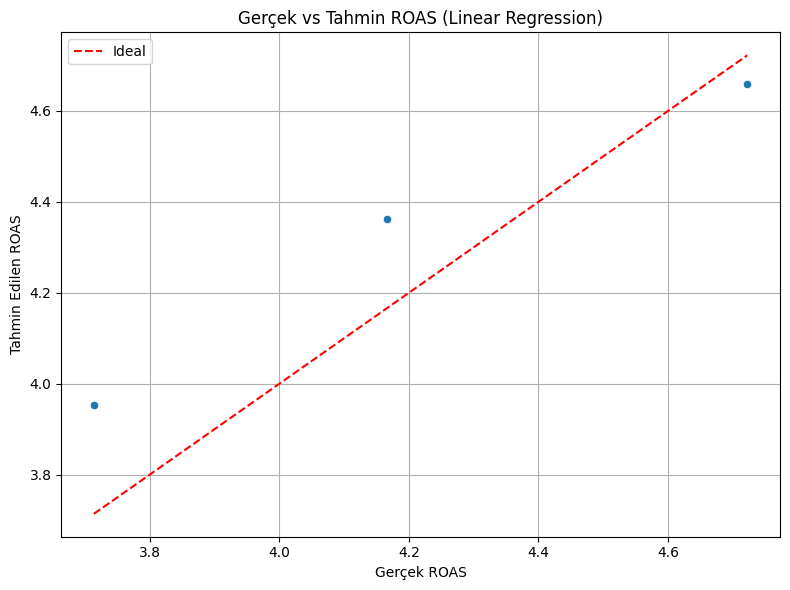

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')  # y = x çizgisi
plt.xlabel("Gerçek ROAS")
plt.ylabel("Tahmin Edilen ROAS")
plt.title("Gerçek vs Tahmin ROAS (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()